# Figure 6
This notebook generates Figure 6 a, b, c; and Figure S6 a.

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

In [3]:
data_dir = "/projects/b1038/Pulmonary/cpuritz/PASC/data"
v = "GEO_v2"
adata = sc.read_h5ad(f"{data_dir}/01NEP/01integrated_NEP_{v}/01integrated_NEP_{v}.h5ad")

## Figure 6a

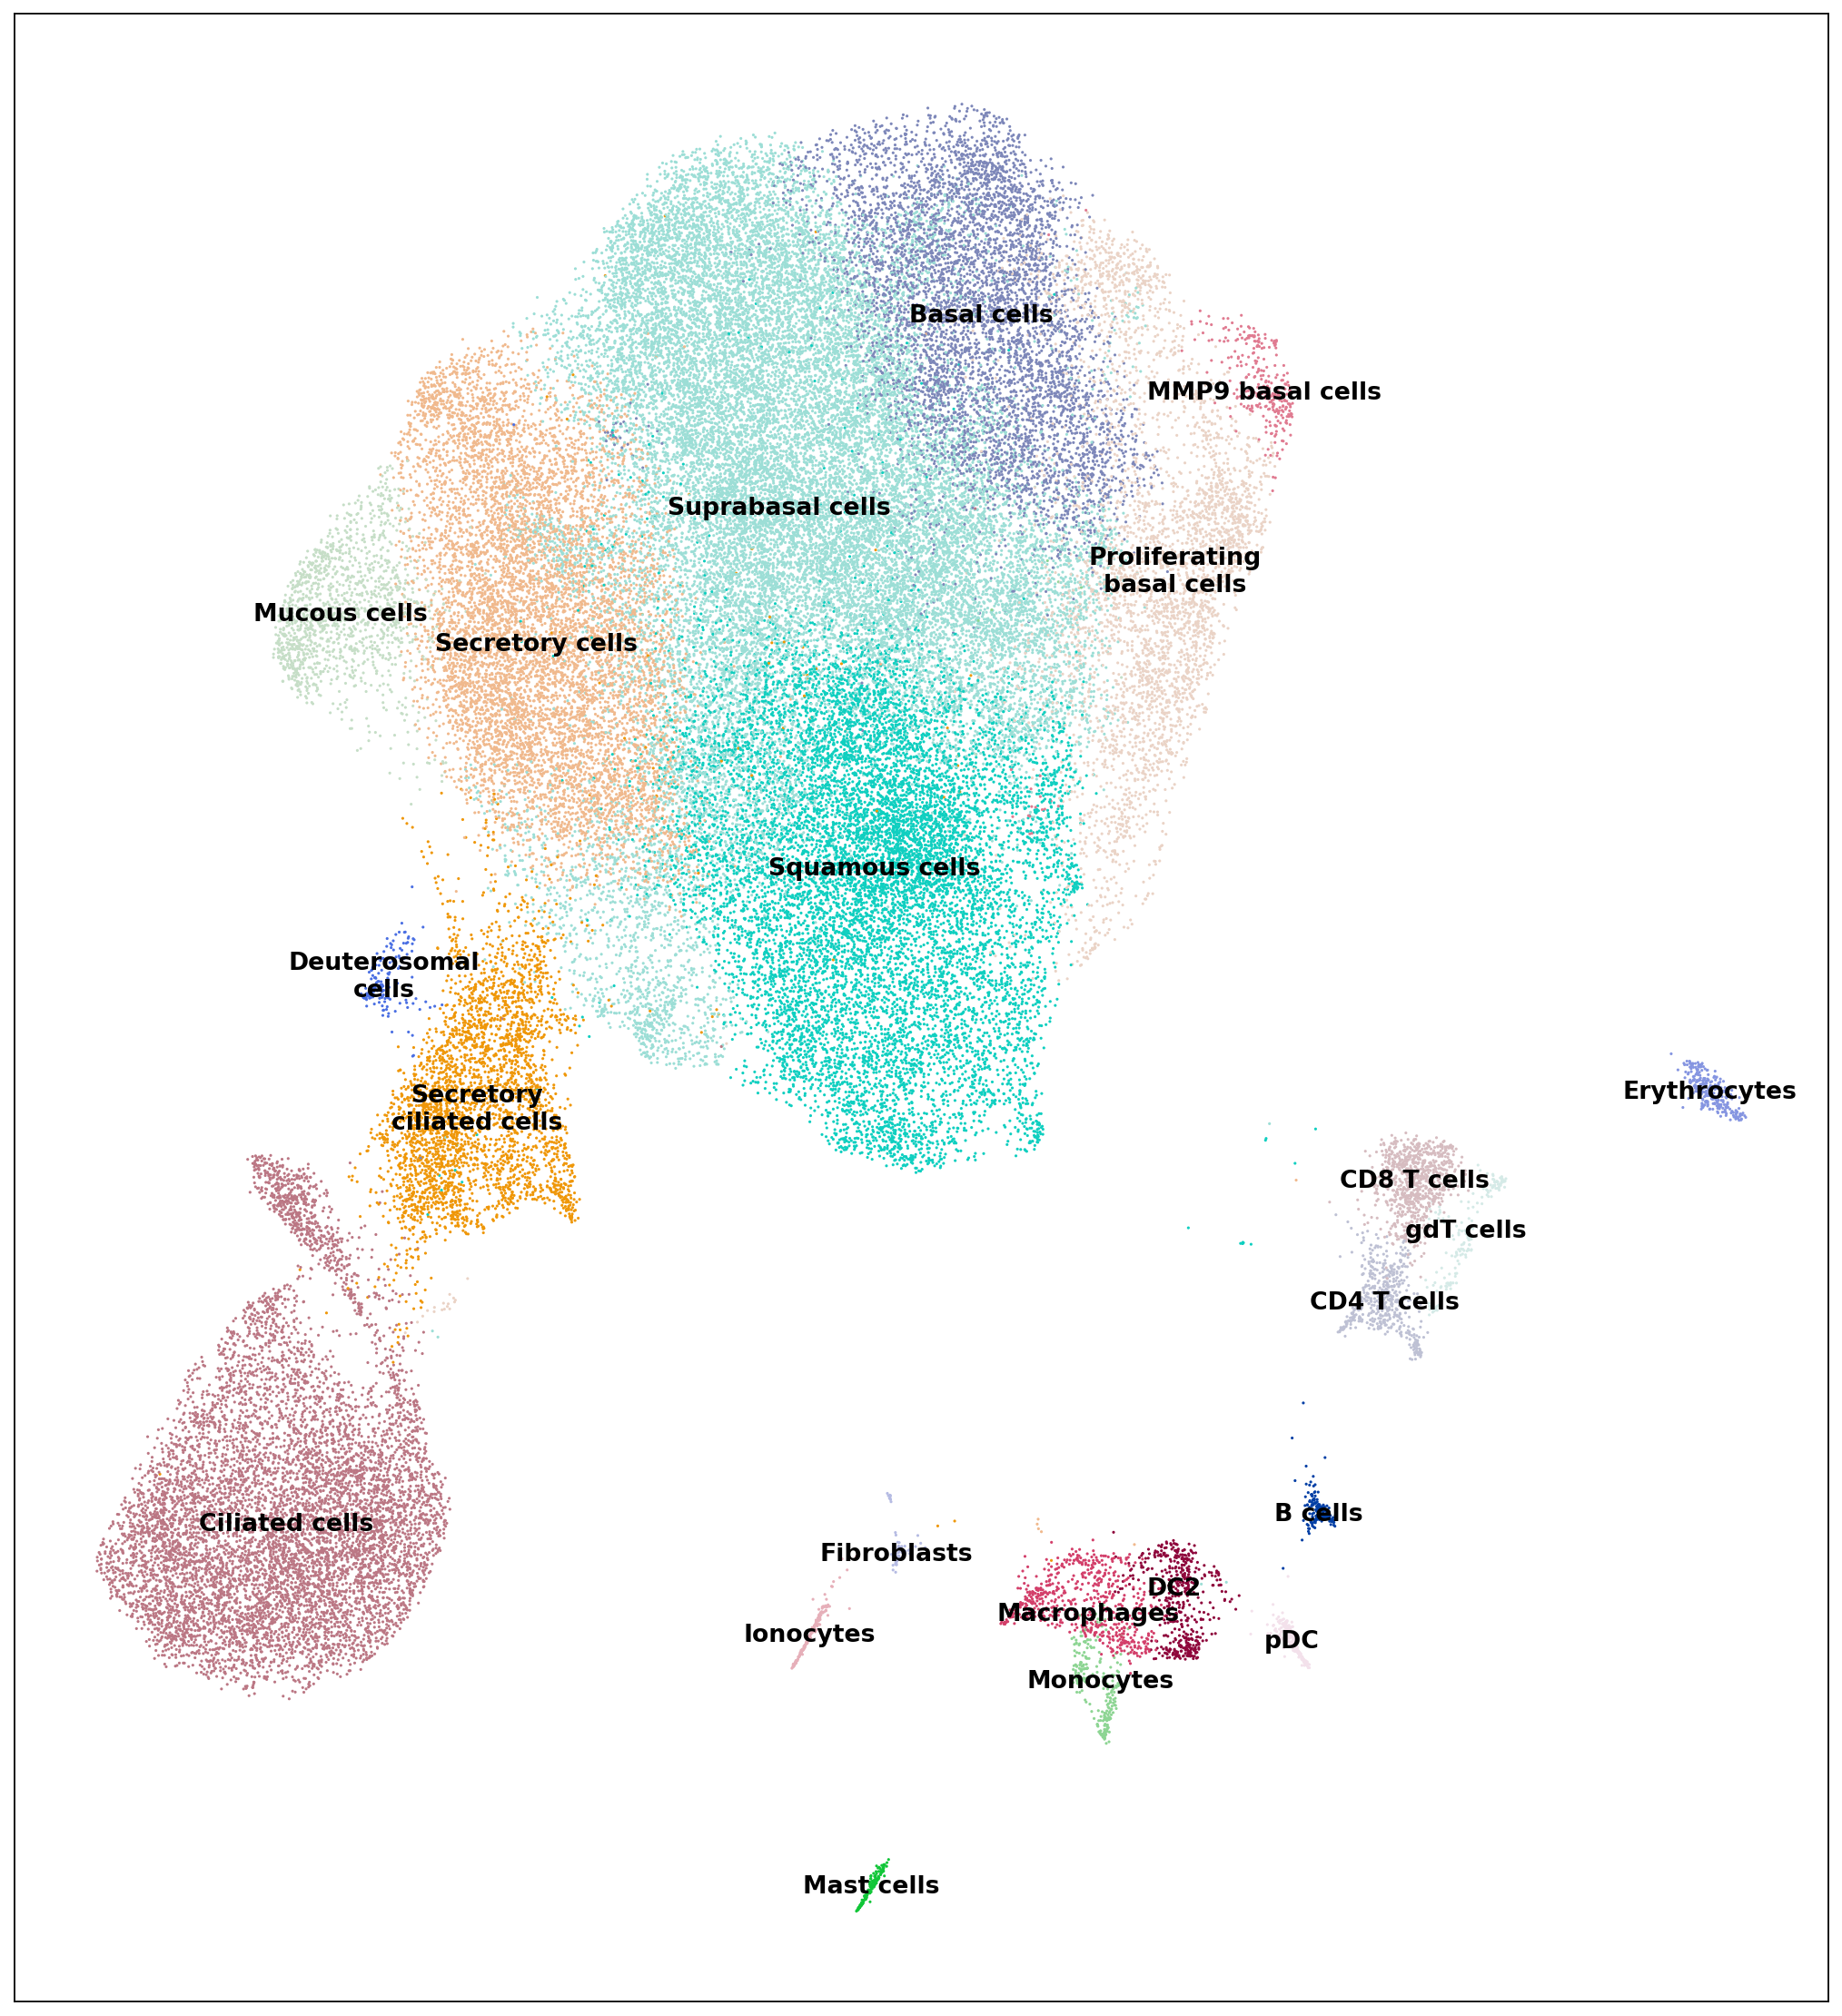

In [18]:
sc.set_figure_params(vector_friendly = True, dpi_save = 150, figsize = (16, 18), fontsize = 12)
um = sc.pl.umap(adata, color = "cell_type", legend_loc = "on data", frameon = True, title = "", size = 8,
                show = False)

um.texts[5].set_x(um.texts[5].get_unitless_position()[0] - 0.1)
um.texts[5].set_y(um.texts[5].get_unitless_position()[1] + 0.05)
um.texts[11].set_y(um.texts[11].get_unitless_position()[1] - 0.1)
um.texts[16].set_y(um.texts[16].get_unitless_position()[1] - 0.1)

um.texts[15].set_text(um.texts[15].get_text().replace(' b', '\nb'))
um.texts[15].set_x(um.texts[15].get_unitless_position()[0] + 0.4)

um.texts[17].set_text(um.texts[17].get_text().replace('y ', 'y\n'))
um.texts[6].set_text(um.texts[6].get_text().replace(' ', '\n'))
um.texts[6].set_y(um.texts[6].get_unitless_position()[1] + 0.1)

plt.xlabel('')
plt.ylabel('')
plt.savefig(f"{data_dir}/figures/fig_6/fig_6a.pdf", bbox_inches = "tight", transparent = True)

## Figure 6b

In [5]:
adata_rpra = adata[adata.obs.Status == 'RPRA'].copy()
adata_ctrl = adata[adata.obs.Status == 'Healthy'].copy()

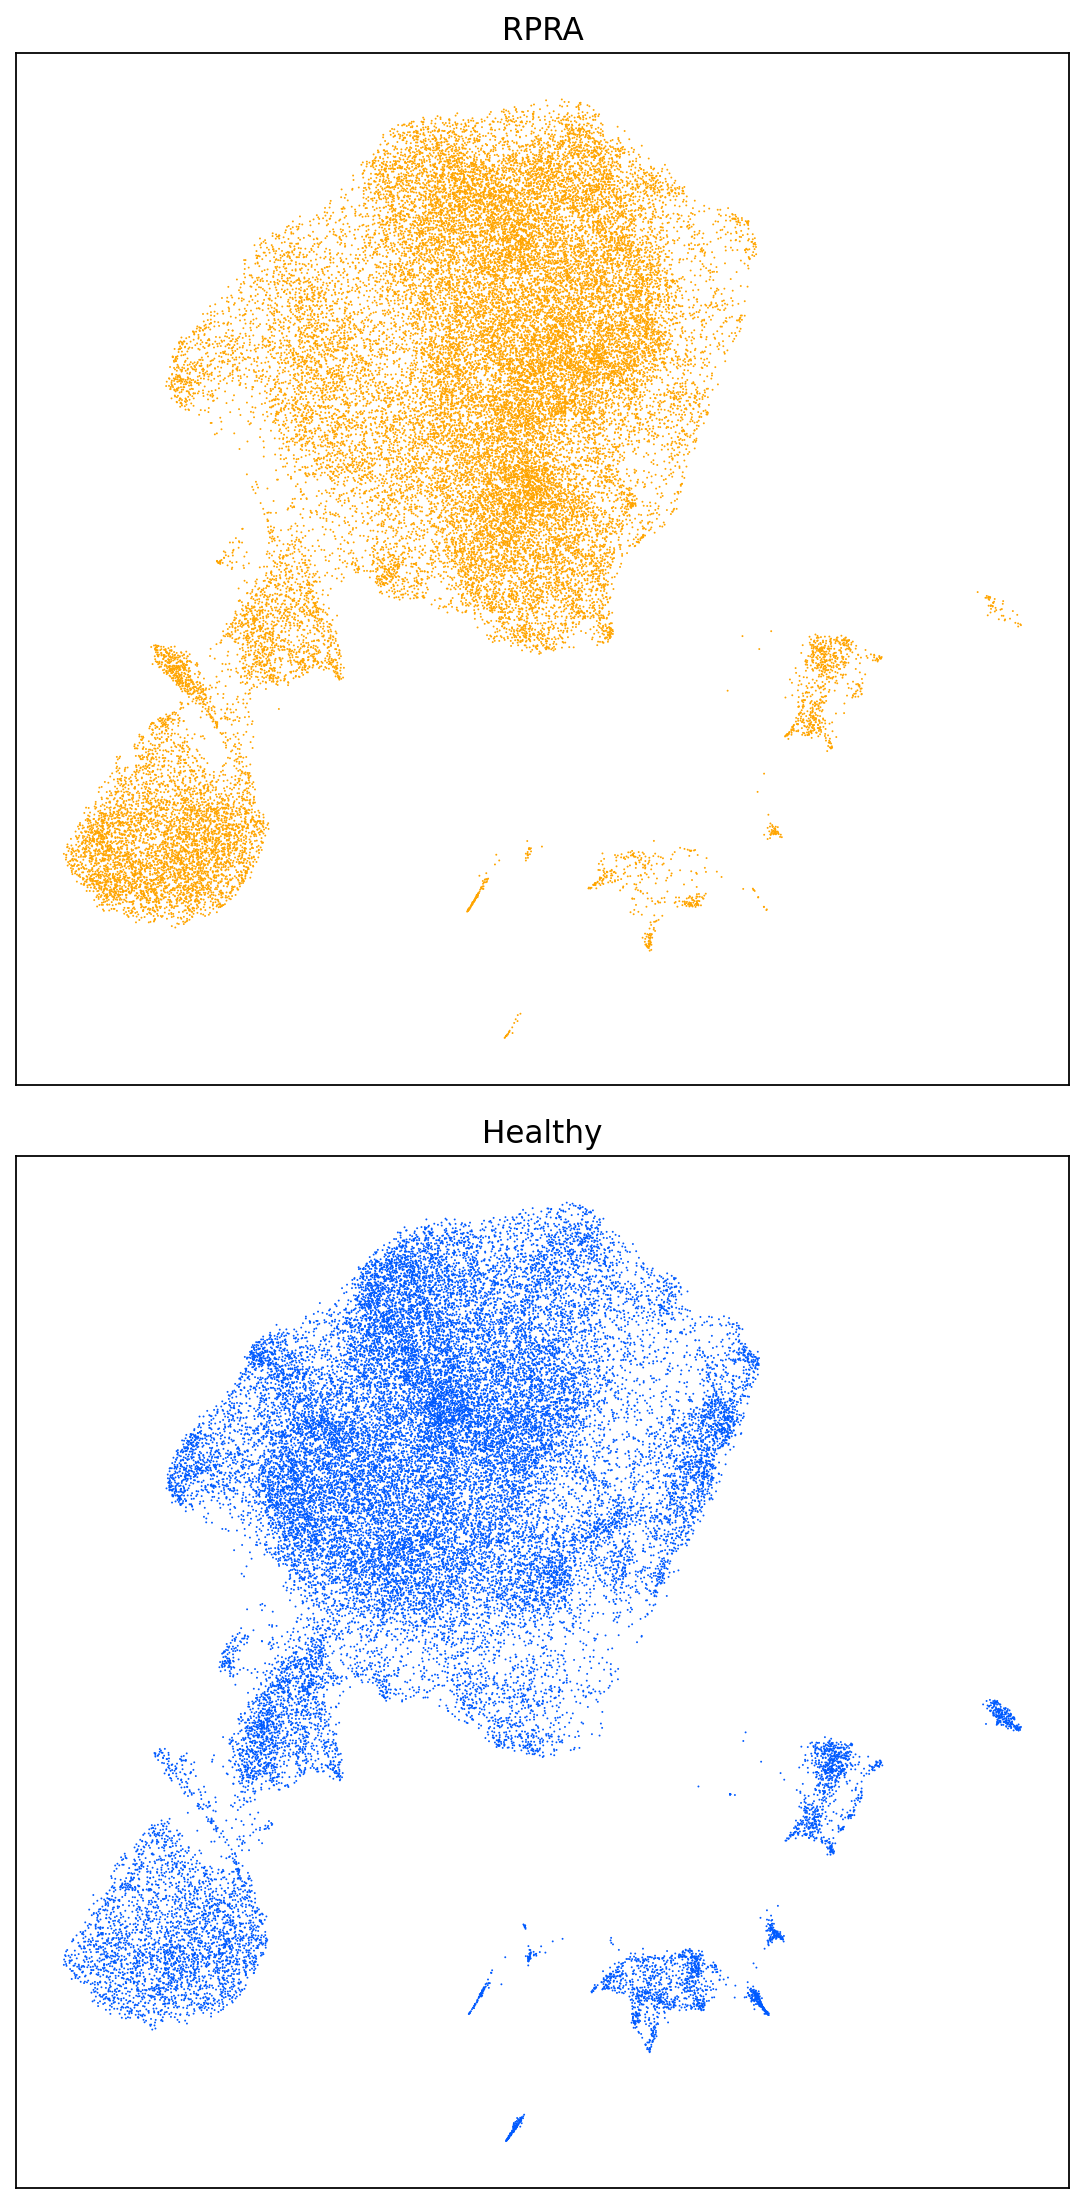

In [12]:
sc.set_figure_params(vector_friendly = True, dpi_save = 150, fontsize = 14, figsize = (7, 14))
fig, ax = plt.subplots(2, 1)

pal = {'Healthy': '#005aff', 'RPRA': '#ffa500'}
sc.pl.umap(adata_rpra, ax = ax[0], show = False, title = 'RPRA', color = 'Status', palette = pal, size = 3)
sc.pl.umap(adata_ctrl, ax = ax[1], show = False, title = 'Healthy', color = 'Status', palette = pal, size = 3)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
for i in range(2):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

fig.tight_layout()
plt.savefig(f"{data_dir}/figures/fig_6/fig_6b.pdf", bbox_inches = "tight", transparent = True)

## Figure 6c

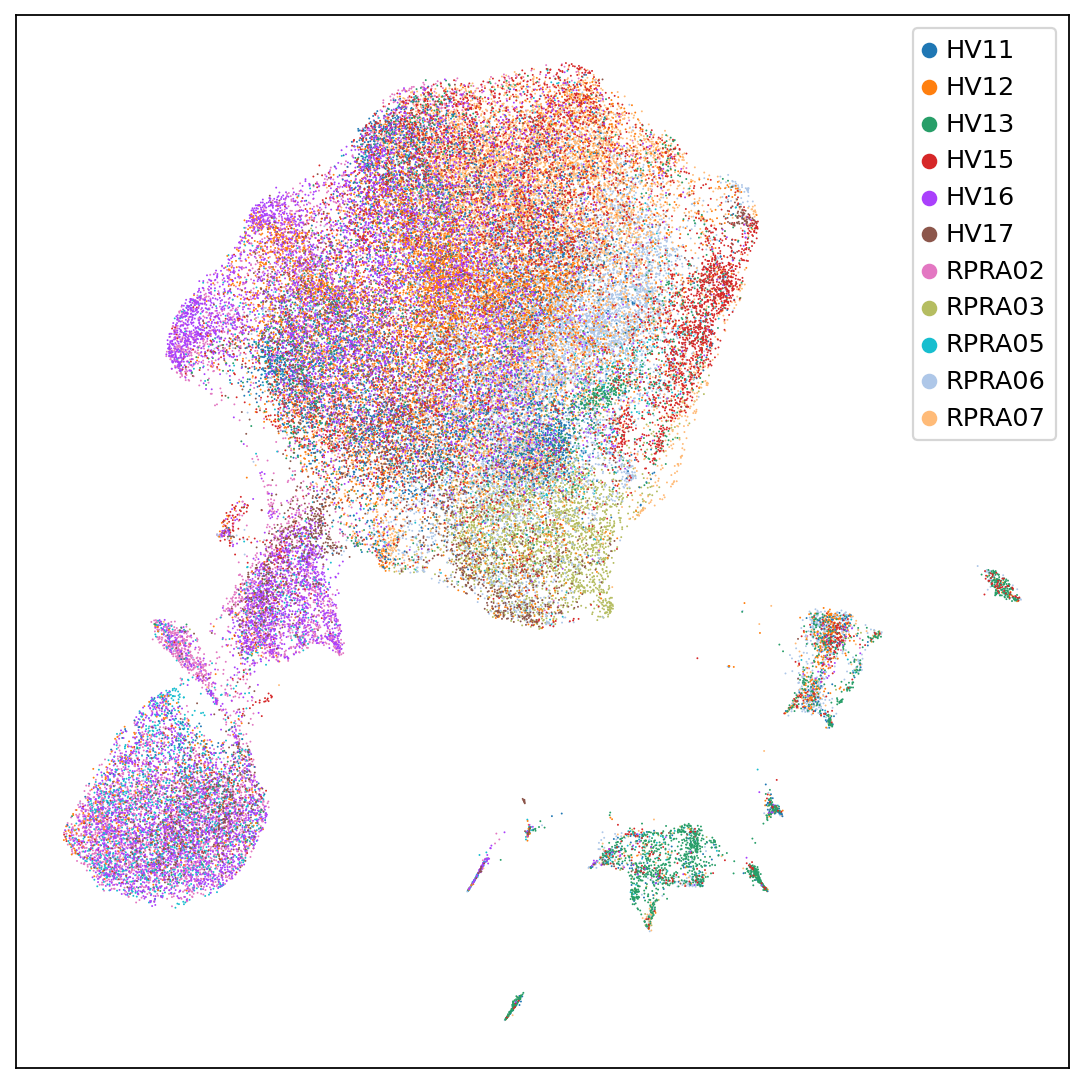

In [14]:
sc.set_figure_params(vector_friendly = True, dpi_save = 125, fontsize = 14, figsize = (7, 7))
fig, ax = plt.subplots()

sc.pl.umap(adata, ax = ax, show = False, title = '', color = 'Study_ID', size = 3)

ax.legend(loc = 'upper right', prop = {'size': 11.5})
ax.set_xlabel('')
ax.set_ylabel('')

fig.tight_layout()
plt.savefig(f"{data_dir}/figures/fig_6/fig_6c.pdf", bbox_inches = "tight", transparent = True)

## Figure S6 a

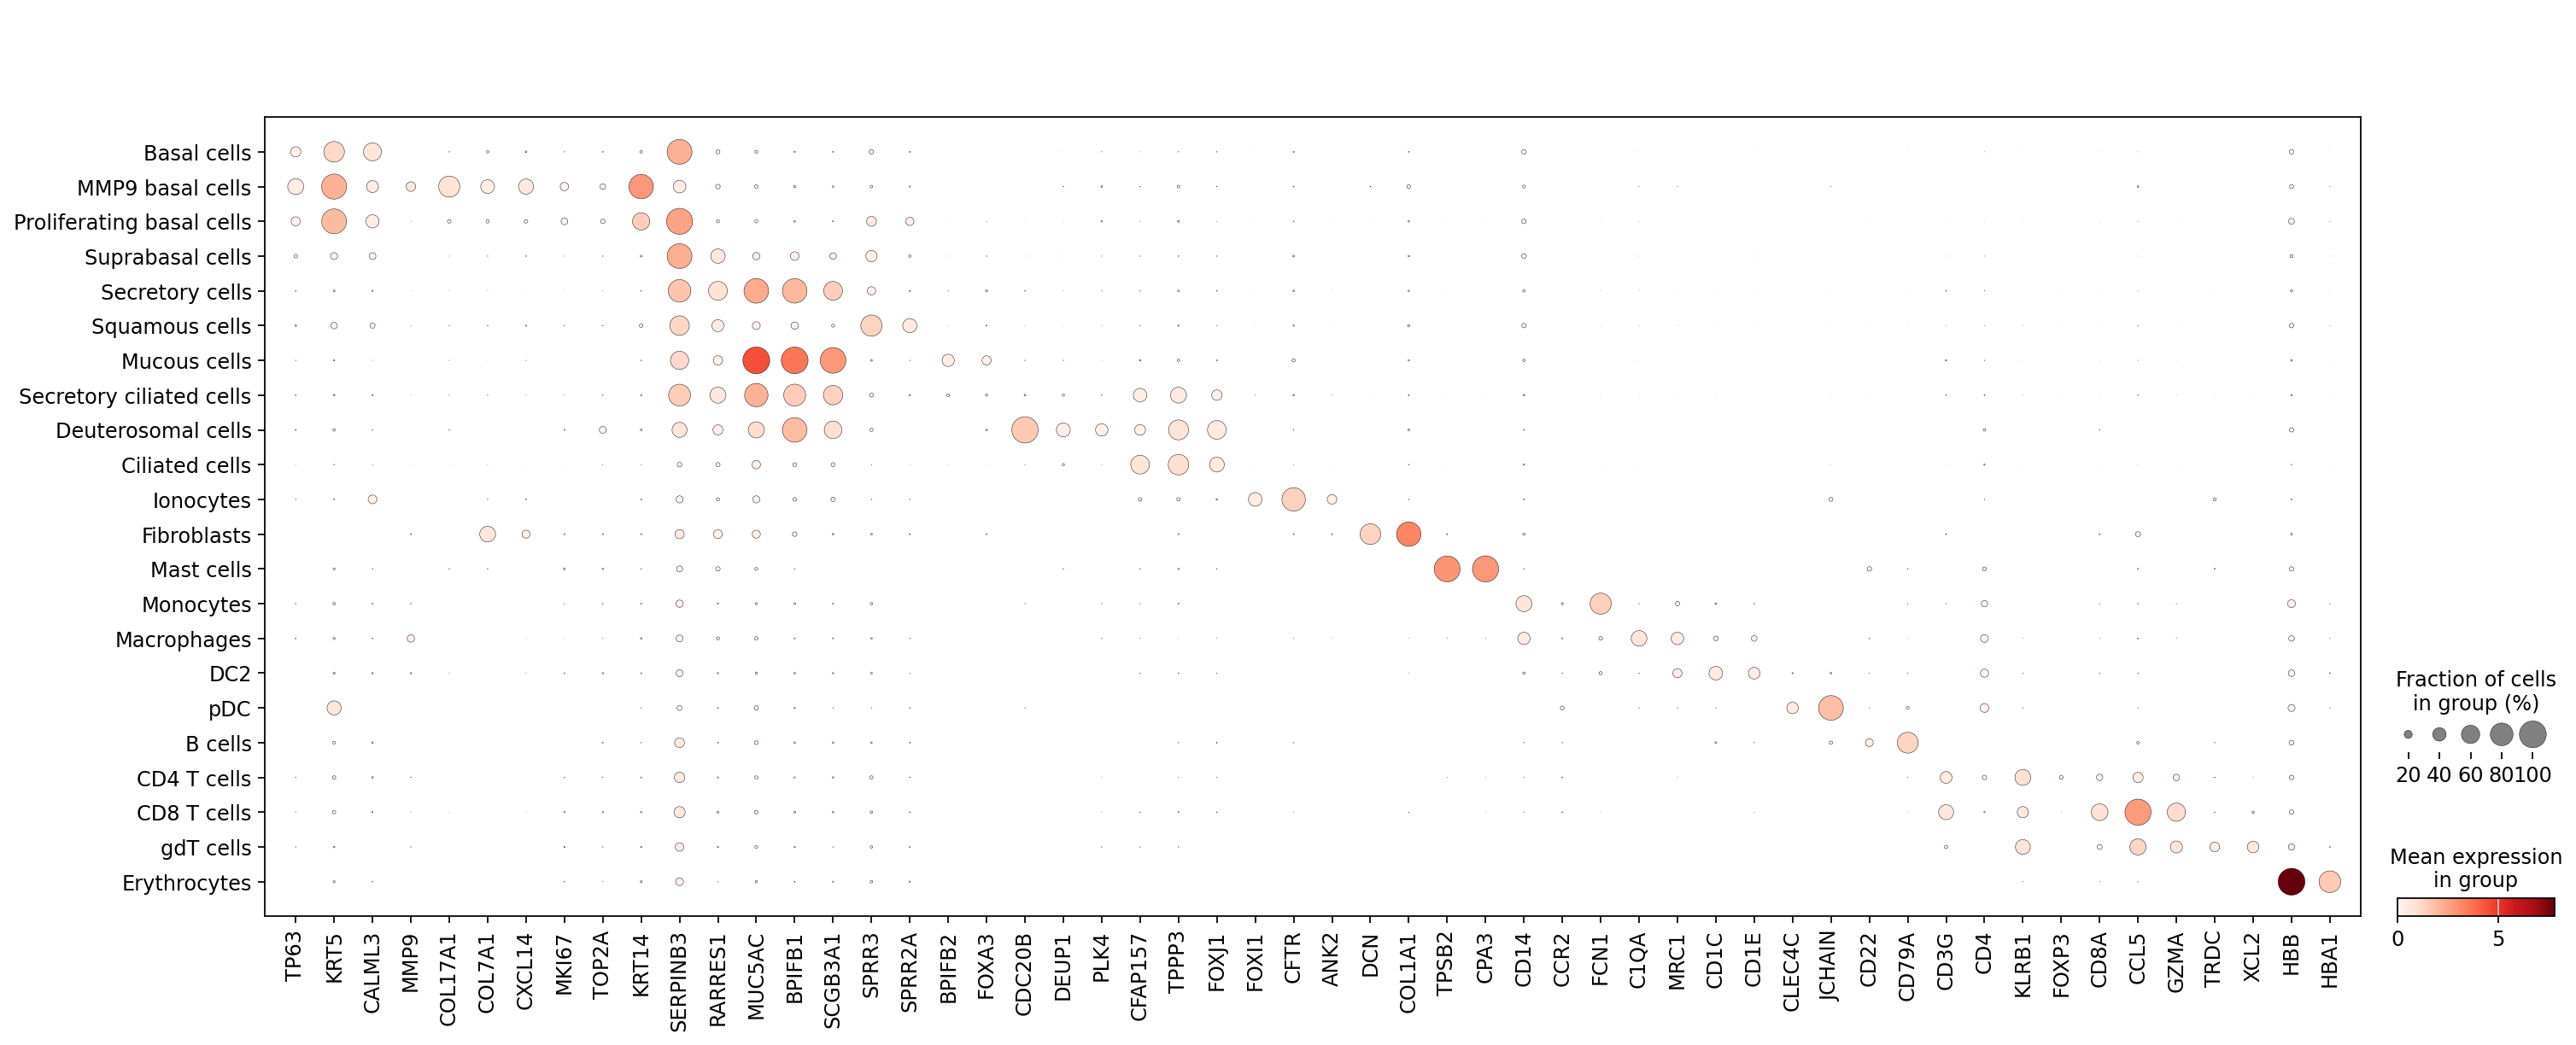

In [7]:
sc.set_figure_params(fontsize = 13)

markers = ['TP63', 'KRT5', 'CALML3', 'MMP9', 'COL17A1', 'COL7A1', 'CXCL14', 'MKI67', 'TOP2A', 'KRT14', 'SERPINB3',
           'RARRES1', 'MUC5AC', 'BPIFB1', 'SCGB3A1', 'SPRR3', 'SPRR2A', 'BPIFB2', 'FOXA3', 'CDC20B', 'DEUP1',
           'PLK4', 'CFAP157', 'TPPP3', 'FOXJ1', 'FOXI1', 'CFTR', 'ANK2', 'DCN', 'COL1A1', 'TPSB2', 'CPA3', 'CD14',
           'CCR2', 'FCN1', 'C1QA', 'MRC1', 'CD1C', 'CD1E', 'CLEC4C', 'JCHAIN', 'CD22', 'CD79A', 'CD3G', 'CD4',
           'KLRB1', 'FOXP3', 'CD8A', 'CCL5', 'GZMA', 'TRDC', 'XCL2', 'HBB', 'HBA1']
cell_order = ['Basal cells', 'MMP9 basal cells', 'Proliferating basal cells', 'Suprabasal cells',
              'Secretory cells', 'Squamous cells', 'Mucous cells', 'Secretory ciliated cells',
              'Deuterosomal cells', 'Ciliated cells', 'Ionocytes', 'Fibroblasts', 'Mast cells', 'Monocytes',
              'Macrophages', 'DC2', 'pDC', 'B cells', 'CD4 T cells', 'CD8 T cells', 'gdT cells', 'Erythrocytes']

dotplot = sc.pl.dotplot(adata, markers, groupby = 'cell_type', categories_order = cell_order,
                        swap_axes = False, show = False)
dotplot['mainplot_ax'].set_xticklabels([x.replace('__', '-') for x in markers])
plt.savefig(f"{data_dir}/figures/fig_s6/fig_s6_a.pdf", bbox_inches = "tight", transparent = True)